### Smart Trash in Our Neighborhoods 

One of our main focal points in determining the best neighborhood is analyzing the environmental aspects of each area and trying to find some particular attributes that we would desire in our ideal neighborhood. In this case, it is the idea of general cleanliness of the neighborhood. Nobody wants to live in an area where the streets are full of litter with sidewalks cluttered with trash. One proposed method is the idea of "smart waste management" and its implementation of smart trash cans. Pittsburgh has adopted this system with the deployment of trash cans that monitor the volume of trash in each bin. This allows for munipalities and trash management workers to optimize their time to empty bins that are more full compared to rotating on a weekly schedule. While this can not account for those who litter ignorantly, it does minimize the excess waste as trash bins are more likely to be empty for use. 

### Analysis

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas

To start, we will import and take a brief look at the information provided by the dataset in the TrashContainers.

In [4]:
containers  = pd.read_csv('Datasets\TrashContainers.csv')
containers.head(10)

,container_id,receptacle_model_id,assignment_date,last_updated_date,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,fire_zone,x,y
0,1,74,2017-09-14T13:24:40,2021-04-15T02:17:22,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.004018,40.456073
1,3,74,2017-09-14T13:24:40,2021-04-15T02:29:18,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.006872,40.456625
2,4,74,2017-09-14T13:24:40,2021-04-15T08:05:23,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-6,-80.006250,40.454520
3,5,74,2017-09-19T12:22:45,2021-04-15T02:28:17,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,1-6,-80.002083,40.456444
4,6,74,2017-09-19T12:22:46,2021-04-15T02:09:18,1st Division,1501 Brighton Rd,Pittsburgh,Pennsylvania,15212,California-Kirkbride,1.0,6.0,25.0,1-21,-80.015758,40.457025
5,7,74,2017-09-19T12:22:46,2021-04-15T02:04:17,1st Division,3113 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,1-14,-80.029040,40.473820
6,8,74,2017-09-19T12:22:46,2021-04-15T02:05:21,1st Division,1729 Brighton Rd,Pittsburgh,Pennsylvania,15212,California-Kirkbride,1.0,6.0,25.0,1-21,-80.016706,40.459364
7,9,74,2017-09-19T12:22:46,2021-04-15T02:22:18,1st Division,710 W North Ave,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,1-21,-80.014095,40.453969
8,10,74,2017-09-19T12:22:46,2021-04-15T02:19:16,1st Division,919 Fulton St,Pittsburgh,Pennsylvania,15233,Manchester,1.0,6.0,21.0,1-8,-80.023932,40.451663
9,11,74,2017-09-19T12:22:46,2021-04-15T02:00:33,1st Division,3900 Perrysville Ave,Pittsburgh,Pennsylvania,15214,Perry North,1.0,1.0,26.0,1-15,-80.018440,40.489410


Certain columns such as receptacle model id,the dates, and fire zones are not particularly relevant in our analysis as we are going to focus on concentrated areas of smart trash containers. 
We can drop these columns to refine the data a little bit.

In [6]:
containers.drop('receptacle_model_id', inplace=True, axis=1)
containers.drop('assignment_date', inplace=True, axis=1)
containers.drop('last_updated_date', inplace=True, axis=1)
containers.drop('fire_zone', inplace=True, axis=1)
containers.head(10)

,container_id,group_name,address,city,state,zip,neighborhood,dpw_division,council_district,ward,x,y
0,1,1st Division,122 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,-80.004018,40.456073
1,3,1st Division,1300 Federal St,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,-80.006872,40.456625
2,4,1st Division,110 Federal St,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,-80.006250,40.454520
3,5,1st Division,490 E North Ave,Pittsburgh,Pennsylvania,15212,Central Northside,1.0,1.0,22.0,-80.002083,40.456444
4,6,1st Division,1501 Brighton Rd,Pittsburgh,Pennsylvania,15212,California-Kirkbride,1.0,6.0,25.0,-80.015758,40.457025
5,7,1st Division,3113 Brighton Rd,Pittsburgh,Pennsylvania,15212,Marshall-Shadeland,1.0,1.0,27.0,-80.029040,40.473820
6,8,1st Division,1729 Brighton Rd,Pittsburgh,Pennsylvania,15212,California-Kirkbride,1.0,6.0,25.0,-80.016706,40.459364
7,9,1st Division,710 W North Ave,Pittsburgh,Pennsylvania,15212,Allegheny Center,1.0,1.0,22.0,-80.014095,40.453969
8,10,1st Division,919 Fulton St,Pittsburgh,Pennsylvania,15233,Manchester,1.0,6.0,21.0,-80.023932,40.451663
9,11,1st Division,3900 Perrysville Ave,Pittsburgh,Pennsylvania,15214,Perry North,1.0,1.0,26.0,-80.018440,40.489410


This allows use to see what specifications we are working with in the smart trash dataset. 
The next step is to sum up the amount of smart trash cans in each neighborhood. 

In [25]:
bins = containers.groupby('neighborhood').count()
bins

,container_id,group_name,address,city,state,zip,dpw_division,council_district,ward,x,y
neighborhood,,,,,,,,,,,
Allegheny Center,9,9,9,9,9,9,9,9,9,9,9
Allegheny West,15,15,15,15,15,15,15,15,15,15,15
Allentown,12,12,12,12,12,12,12,12,12,12,12
Arlington,3,3,3,3,3,3,3,3,3,3,3
Banksville,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,16,16,16,16,16,16,16,16,16,16,16
West End,9,9,9,9,9,9,9,9,9,9,9
West Oakland,9,9,9,9,9,9,9,9,9,9,9


This is getting showing the numerical value of the sum of trash bins in each neighborhood. I want to visualize this into a choropleth graph similar to a heat map and just regular map plotted with where each trash bin is. 

<AxesSubplot:>

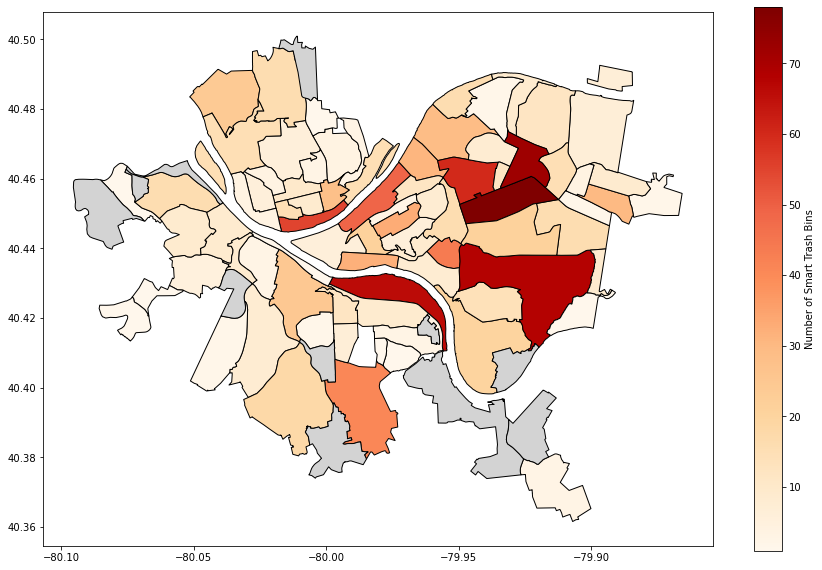

In [35]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
bin_map = neighborhoods.merge(bins, how='left', left_on='hood', right_on='neighborhood')
bin_map.plot(column='ward',
             cmap='OrRd',
             edgecolor="black",
             legend=True,
             legend_kwds={'label':"Number of Smart Trash Bins"},
             figsize=(15,10),
             missing_kwds={"color": "lightgrey"}
            )